In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

In [1]:
data = pd.read_excel("solar-potential-2.xlsx")
print(data)
print(data.head())
data1 = data["Suitability"].copy()
data2= data[["Insolation, kWh/m2 per yr", "Unshaded roof area (m2)"]].copy()
data1 = data1.to_numpy()
data2 = data2.to_numpy()
train_x, test_x, train_y, test_y = train_test_split(data2,data1, test_size=0.19)
print(len(train_x),len(test_x))


NameError: name 'pd' is not defined

Accuracy Score of Random Forest Classifier: 100.0%
                    precision    recall  f1-score   support

          suitable       1.00      1.00      1.00     16763
     well suitable       1.00      1.00      1.00       933
excellent suitable       1.00      1.00      1.00     12353

          accuracy                           1.00     30049
         macro avg       1.00      1.00      1.00     30049
      weighted avg       1.00      1.00      1.00     30049



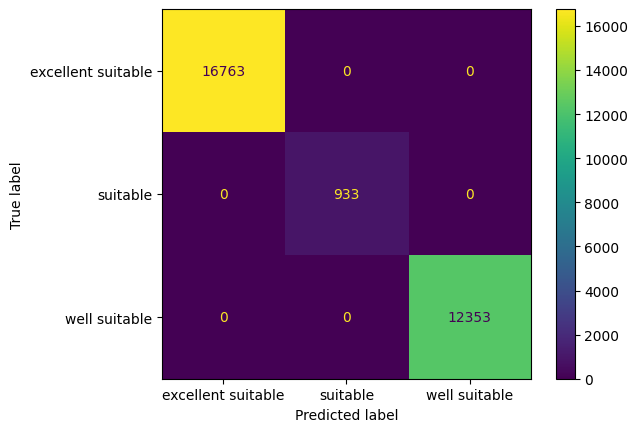

In [28]:
rfc = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_samples=None)

# Fit RFC and predict using the testing set
rfc.fit(train_x, train_y)
pred2 = rfc.predict(test_x)

# Performance Report of rfc
print(f"Accuracy Score of Random Forest Classifier: {accuracy_score(pred2,test_y)*100}%")
cm = confusion_matrix(test_y, pred2, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# rfc_disp = RocCurveDisplay.from_estimator(rfc, test_x, test_y, ax=ax1)
# prec, recall, _ = precision_recall_curve(test_y, pred2, pos_label=rfc.classes_[1])
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

print(classification_report(test_y, pred2, target_names=["suitable", "well suitable", "excellent suitable"]))

# pr_display.plot(ax=ax2)
# plt.show()

Accuracy Score for SVC: 99.96006522679623%
                    precision    recall  f1-score   support

          suitable       1.00      1.00      1.00     16763
     well suitable       1.00      1.00      1.00       933
excellent suitable       1.00      1.00      1.00     12353

          accuracy                           1.00     30049
         macro avg       1.00      1.00      1.00     30049
      weighted avg       1.00      1.00      1.00     30049



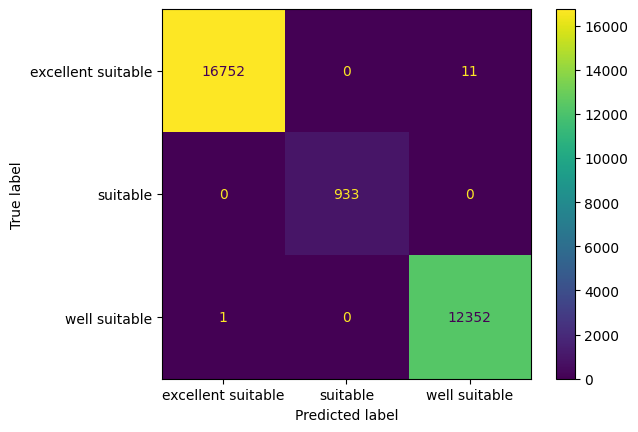

In [30]:
svc = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=2.3, gamma="auto"))
])

svc.fit(train_x,train_y)
pred = svc.predict(test_x)

# Performance report of SVM 
print(f"Accuracy Score for SVC: {accuracy_score(pred, test_y)*100}%")
cm = confusion_matrix(test_y, pred, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# svc_disp = RocCurveDisplay.from_estimator(svc, test_x, test_y, ax=ax1)
# prec, recall, _ = precision_recall_curve(test_y, pred, pos_label=svc.classes_[1])
# pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

print(classification_report(test_y, pred, target_names=["suitable", "well suitable", "excellent suitable"]))

# rfc_disp.plot(ax=ax1)
# pr_display.plot(ax=ax2)


In [30]:
data = pd.read_excel("solar-potential-2.xlsx", usecols=["Insolation, kWh/m2 per yr","Unshaded roof area (m2)","PV generation (kWh/yr)"])
print(data.head())

data2 = data[["Insolation, kWh/m2 per yr", "Unshaded roof area (m2)"]].copy()
data1 = data["PV generation (kWh/yr)"].copy()
data1 = data1.to_numpy()
data2 = data2.to_numpy()
print(data1)
train_x, test_x, train_y, test_y = train_test_split(data2,data1, test_size=0.19)
print(len(train_x),len(test_x))

   Insolation, kWh/m2 per yr  Unshaded roof area (m2)  PV generation (kWh/yr)
0                  1003.0588                  16.4332               1483.5100
1                   975.4151                  52.2486               4586.7646
2                   983.2857                  11.7170               1036.9071
3                   974.2069                  22.4861               1971.5488
4                  1024.0000                  18.4168               1697.2917
[[1483.51  ]
 [4586.7646]
 [1036.9071]
 ...
 [1039.8474]
 [1059.7069]
 [4494.0313]]
128099 30049


In [31]:
svc = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=2.3, gamma="auto"))
])
# data1 = data[["PV generation (kWh/yr)"]].copy()
# data1 = data.copy()
# data2 = data[["Insolation, kWh/m2 per yr", "Unshaded roof area (m2)"]].copy()

# set(data1.columns).symmetric_difference(data2.columns)
# data1 = data1.to_numpy()
# data2 = data2.to_numpy()
print(data1)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)

# Performance report of SVM 
print(f"Accuracy Score for SVC: {accuracy_score(pred, test_y)*100}%")
cm = confusion_matrix(test_y, pred, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

[[1483.51  ]
 [4586.7646]
 [1036.9071]
 ...
 [1039.8474]
 [1059.7069]
 [4494.0313]]


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [28]:
rfc = RandomForestClassifier(n_estimators=50, max_features="sqrt", max_samples=None)
print(data2)
# Fit RFC and predict using the testing set
rfc.fit(train_x, train_y)
pred2 = rfc.predict(test_x)

# Performance Report of rfc
print(f"Accuracy Score of Random Forest Classifier: {accuracy_score(pred2,test_y)*100}%")
cm = confusion_matrix(test_y, pred2, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

[[1003.0588   16.4332 1483.51  ]
 [ 975.4151   52.2486 4586.7646]
 [ 983.2857   11.717  1036.9071]
 ...
 [ 970.       11.9112 1039.8474]
 [ 923.       12.7568 1059.7069]
 [1006.0213   49.6348 4494.0313]]


ValueError: Unknown label type: 'continuous-multioutput'